# Caso de uso: leer Facebook, obtener estadísticas y aplicar análisis de sentimiento

In [45]:
from facebook_scraper import get_posts   #pip install facebook-scraper
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Inicialice el marco de datos para raspar la publicación de Facebook
post_df_full = pd.DataFrame(columns = [])

In [47]:
# Comience a recopilar datos de publicaciones de Facebook mediante la biblioteca facebook_scraper
for post in get_posts('nintendo',extra_info=True, pages=10, options={"comments": True,"reactors": True}):
    post_entry = post
    fb_post_df = pd.DataFrame.from_dict(post_entry, orient='index')
    fb_post_df = fb_post_df.transpose()
    post_df_full = post_df_full.append(fb_post_df)
    print(post['post_id']+' get')

c:\Users\jeanc\anaconda3\lib\site-packages\dateparser\freshness_date_parser.py:76: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  now = self.get_local_tz().localize(now)
C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


6231271843623883 get


c:\Users\jeanc\anaconda3\lib\site-packages\dateparser\freshness_date_parser.py:76: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  now = self.get_local_tz().localize(now)
C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


6228413480576386 get


c:\Users\jeanc\anaconda3\lib\site-packages\dateparser\freshness_date_parser.py:76: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  now = self.get_local_tz().localize(now)
C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


6215040711913663 get


c:\Users\jeanc\anaconda3\lib\site-packages\dateparser\freshness_date_parser.py:76: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  now = self.get_local_tz().localize(now)
C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


6208937882523946 get


c:\Users\jeanc\anaconda3\lib\site-packages\dateparser\freshness_date_parser.py:76: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  now = self.get_local_tz().localize(now)
C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


6208437629240638 get


c:\Users\jeanc\anaconda3\lib\site-packages\dateparser\freshness_date_parser.py:76: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  now = self.get_local_tz().localize(now)
C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


6197902063627528 get


c:\Users\jeanc\anaconda3\lib\site-packages\dateparser\freshness_date_parser.py:76: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  now = self.get_local_tz().localize(now)
C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


6178410538910014 get


C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


6178283758922692 get


C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


6177946375623097 get


c:\Users\jeanc\anaconda3\lib\site-packages\dateparser\freshness_date_parser.py:76: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  now = self.get_local_tz().localize(now)
C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


6176022099148858 get


C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


6159700744051164 get


c:\Users\jeanc\anaconda3\lib\site-packages\dateparser\freshness_date_parser.py:76: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  now = self.get_local_tz().localize(now)
C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


6152834834800918 get


c:\Users\jeanc\anaconda3\lib\site-packages\dateparser\freshness_date_parser.py:76: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  now = self.get_local_tz().localize(now)
C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


6141876955896706 get


c:\Users\jeanc\anaconda3\lib\site-packages\dateparser\freshness_date_parser.py:76: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  now = self.get_local_tz().localize(now)
C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


6125466404204428 get


c:\Users\jeanc\anaconda3\lib\site-packages\dateparser\freshness_date_parser.py:76: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  now = self.get_local_tz().localize(now)
C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


6110642209020181 get


c:\Users\jeanc\anaconda3\lib\site-packages\dateparser\freshness_date_parser.py:76: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  now = self.get_local_tz().localize(now)
C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


6104826249601777 get


C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


6100710646680004 get


c:\Users\jeanc\anaconda3\lib\site-packages\dateparser\freshness_date_parser.py:76: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  now = self.get_local_tz().localize(now)
C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


6094895707261498 get


c:\Users\jeanc\anaconda3\lib\site-packages\dateparser\freshness_date_parser.py:76: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  now = self.get_local_tz().localize(now)
C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


6087937257957343 get


c:\Users\jeanc\anaconda3\lib\site-packages\dateparser\freshness_date_parser.py:76: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  now = self.get_local_tz().localize(now)
C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


6087579974659738 get


c:\Users\jeanc\anaconda3\lib\site-packages\dateparser\freshness_date_parser.py:76: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  now = self.get_local_tz().localize(now)
C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


6084946241589778 get


C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


6082154388535630 get


C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


6082088135208922 get


C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


6082039108547158 get


C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


6081959475221788 get


C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


6081901235227612 get


c:\Users\jeanc\anaconda3\lib\site-packages\dateparser\freshness_date_parser.py:76: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  now = self.get_local_tz().localize(now)
C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


6077332939017775 get


c:\Users\jeanc\anaconda3\lib\site-packages\dateparser\freshness_date_parser.py:76: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  now = self.get_local_tz().localize(now)
C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


6065983016819434 get


c:\Users\jeanc\anaconda3\lib\site-packages\dateparser\freshness_date_parser.py:76: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  now = self.get_local_tz().localize(now)
C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


5966050133479390 get


c:\Users\jeanc\anaconda3\lib\site-packages\dateparser\freshness_date_parser.py:76: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  now = self.get_local_tz().localize(now)
C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


5946525498765187 get


c:\Users\jeanc\anaconda3\lib\site-packages\dateparser\freshness_date_parser.py:76: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  now = self.get_local_tz().localize(now)
C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


5938254159592321 get


C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


5932605046823899 get


C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


5921190411298696 get


C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


5915864221831315 get


C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


5914497148634689 get


c:\Users\jeanc\anaconda3\lib\site-packages\dateparser\freshness_date_parser.py:76: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  now = self.get_local_tz().localize(now)


5886949091389495 get


C:\Users\jeanc\AppData\Local\Temp\ipykernel_18000\1137187544.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_df_full = post_df_full.append(fb_post_df)


In [48]:
# Verifique la información del marco de datos, se están raspando 47 columnas de datos de la publicación de Facebook
post_df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 0
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   post_id                        36 non-null     object        
 1   text                           35 non-null     object        
 2   post_text                      35 non-null     object        
 3   shared_text                    34 non-null     object        
 4   original_text                  0 non-null      object        
 5   time                           36 non-null     datetime64[ns]
 6   timestamp                      36 non-null     object        
 7   image                          19 non-null     object        
 8   image_lowquality               36 non-null     object        
 9   images                         36 non-null     object        
 10  images_description             36 non-null     object        
 11  images_lowquality     

In [49]:
post_df_full.to_csv(r'nintendo_facebook_post.csv', sep=';', encoding='utf-8', header='true')

In [50]:
post_df_full_clean = post_df_full

In [51]:
post_df_full_clean.head()

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,w3_fb_url,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,header
0,6231271843623883,Get an introduction to Link’s new abilities in...,Get an introduction to Link’s new abilities in...,,None,2023-03-28 08:16:22,1680012982,None,https://scontent.fsjo3-1.fna.fbcdn.net/v/t15.5...,[],...,None,None,1193,"[{'name': 'The Legend of Zelda', 'link': '/Leg...",119240841493711,None,None,[],False,Nintendo of America
0,6228413480576386,"Join The Legend of #Zelda series producer, Eij...","Join The Legend of #Zelda series producer, Eij...",,None,2023-03-27 08:26:22,1679927182,https://scontent.fsjo3-1.fna.fbcdn.net/v/t39.3...,https://scontent.fsjo3-1.fna.fbcdn.net/v/t39.3...,[https://scontent.fsjo3-1.fna.fbcdn.net/v/t39....,...,None,None,2035,"[{'name': 'The Legend of Zelda', 'link': '/Leg...",119240841493711,None,6119331691461243,[6119331691461243],False,Nintendo of America
0,6215040711913663,None,None,None,None,2023-03-22 13:19:33,1679512773,https://scontent.fsjo3-1.fna.fbcdn.net/v/t39.3...,https://scontent.fsjo3-1.fna.fbcdn.net/v/t39.3...,[https://scontent.fsjo3-1.fna.fbcdn.net/v/t39....,...,None,None,200,None,119240841493711,None,6215040711913663,[6215040711913663],False,NaN
0,6208937882523946,#PAXEast is this weekend and My Nintendo is re...,#PAXEast is this weekend and My Nintendo is re...,,None,2023-03-20 10:34:54,1679330094,https://scontent.fsjo3-1.fna.fbcdn.net/v/t39.3...,https://scontent.fsjo3-1.fna.fbcdn.net/v/t39.3...,[https://scontent.fsjo3-1.fna.fbcdn.net/v/t39....,...,None,None,313,None,119240841493711,None,6208937882523946,[6208937882523946],False,NaN
0,6208437629240638,Celebrate the ground-pounding superstar by sav...,Celebrate the ground-pounding superstar by sav...,,None,2023-03-20 07:00:02,1679317202,https://scontent.fsjo3-1.fna.fbcdn.net/v/t39.3...,https://scontent.fsjo3-1.fna.fbcdn.net/v/t39.3...,[https://scontent.fsjo3-1.fna.fbcdn.net/v/t39....,...,None,None,538,None,119240841493711,None,6208437629240638,[6208437629240638],False,NaN


In [52]:
# Display header of dataframe
post_df_full.head()

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,w3_fb_url,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,header
0,6231271843623883,Get an introduction to Link’s new abilities in...,Get an introduction to Link’s new abilities in...,,None,2023-03-28 08:16:22,1680012982,None,https://scontent.fsjo3-1.fna.fbcdn.net/v/t15.5...,[],...,None,None,1193,"[{'name': 'The Legend of Zelda', 'link': '/Leg...",119240841493711,None,None,[],False,Nintendo of America
0,6228413480576386,"Join The Legend of #Zelda series producer, Eij...","Join The Legend of #Zelda series producer, Eij...",,None,2023-03-27 08:26:22,1679927182,https://scontent.fsjo3-1.fna.fbcdn.net/v/t39.3...,https://scontent.fsjo3-1.fna.fbcdn.net/v/t39.3...,[https://scontent.fsjo3-1.fna.fbcdn.net/v/t39....,...,None,None,2035,"[{'name': 'The Legend of Zelda', 'link': '/Leg...",119240841493711,None,6119331691461243,[6119331691461243],False,Nintendo of America
0,6215040711913663,None,None,None,None,2023-03-22 13:19:33,1679512773,https://scontent.fsjo3-1.fna.fbcdn.net/v/t39.3...,https://scontent.fsjo3-1.fna.fbcdn.net/v/t39.3...,[https://scontent.fsjo3-1.fna.fbcdn.net/v/t39....,...,None,None,200,None,119240841493711,None,6215040711913663,[6215040711913663],False,NaN
0,6208937882523946,#PAXEast is this weekend and My Nintendo is re...,#PAXEast is this weekend and My Nintendo is re...,,None,2023-03-20 10:34:54,1679330094,https://scontent.fsjo3-1.fna.fbcdn.net/v/t39.3...,https://scontent.fsjo3-1.fna.fbcdn.net/v/t39.3...,[https://scontent.fsjo3-1.fna.fbcdn.net/v/t39....,...,None,None,313,None,119240841493711,None,6208937882523946,[6208937882523946],False,NaN
0,6208437629240638,Celebrate the ground-pounding superstar by sav...,Celebrate the ground-pounding superstar by sav...,,None,2023-03-20 07:00:02,1679317202,https://scontent.fsjo3-1.fna.fbcdn.net/v/t39.3...,https://scontent.fsjo3-1.fna.fbcdn.net/v/t39.3...,[https://scontent.fsjo3-1.fna.fbcdn.net/v/t39....,...,None,None,538,None,119240841493711,None,6208437629240638,[6208437629240638],False,NaN


In [53]:
# Guarde el marco de datos en el archivo csv
post_df_full.to_csv(r'fb_scrapped_data.csv', index = False)

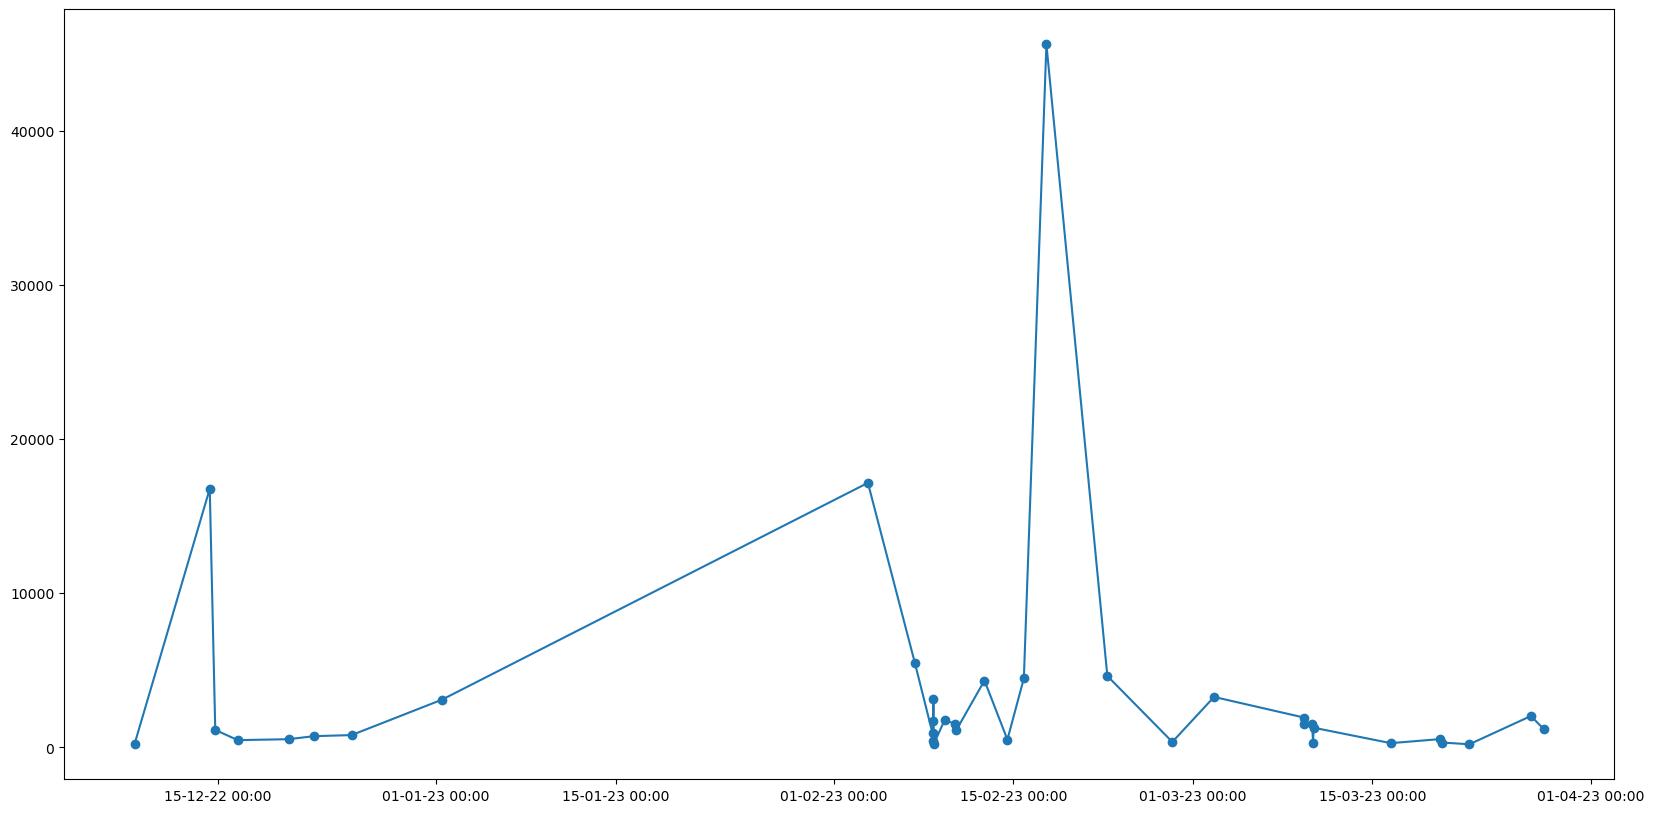

In [54]:
# Realice un gráfico de líneas básico para visualizar la fecha y hora de la publicación frente a los Me gusta
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(post_df_full['time'], post_df_full['likes'], marker="o")
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

In [55]:
post_df_full['text']

0    Get an introduction to Link’s new abilities in...
0    Join The Legend of #Zelda series producer, Eij...
0                                                 None
0    #PAXEast is this weekend and My Nintendo is re...
0    Celebrate the ground-pounding superstar by sav...
0    NintendoVS is bringing the competition to Bost...
0    Make every day a #MAR10Day with a #NintendoSwi...
0    Celebrate the Mushroom Kingdom hero by saving ...
0    Happy #MAR10Day everyone! How will you be cele...
0    Watch the latest Nintendo Direct presentation ...
0    PRESS START. The final #SuperMarioMovie traile...
0    Make every day a #MAR10Day with a Nintendo Swi...
0    The Hidden Treasure of Area Zero for Pokémon S...
0    Join us at 2:00 p.m. PT on 3/9 for the world p...
0    It's SUPER NINTENDO WORLD™ opening day at Univ...
0                                                     
0        Everyone needs a big hug, especially Kirby! 💗
0    For super service, visit SMBPlumbing.com.\n#Su...
0    MIÉ, 